In [1]:
# Importation des librairies
from functions_and_librairies_p9 import *
plt.rcParams["axes.facecolor"] = "None"
plt.rcParams["axes.labelcolor"] = "fc7800"
plt.rcParams["xtick.color"] = "fc5b6b"
plt.rcParams["ytick.color"] = "fc7800"
plt.rcParams["axes.titlecolor"] = "#fc5b6b"
plt.rcParams["axes.titlesize"] = 18
# plt.rcParams["grid.color"] = "#5bd3d3"

In [2]:
# Importation des données au format csv

Df_dispoAlim_2017 = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
Df_stabPolitique = pd.read_csv("FAO_StabPolitique.csv")
Df_population= pd.read_csv("population.csv")


In [3]:
Df_population = Df_population[["Zone","Valeur","Année"]]
Df_population = Df_population.rename(columns={'Valeur' : 'Population'})
Df_population['Population'] = Df_population['Population']*1000
Df_population =pd.pivot_table (Df_population, values='Population', index=['Zone'],columns = "Année")
Df_population['Demographic Evolution']= ((Df_population[2017]-Df_population[2013])/Df_population[2013])*100
Df_population = Df_population[[2017,"Demographic Evolution"]]
Df_population = Df_population.rename(columns={2017 : 'Population'})
Df_population['Année']= 2017
Df_population.head(5)

Année           Population  Demographic Evolution  Année
Zone                                                    
Afghanistan     36296113.0              12.477767   2017
Afrique du Sud  57009756.0               6.188887   2017
Albanie          2884169.0              -0.675703   2017
Algérie         41389189.0               8.518733   2017
Allemagne       82658409.0               1.828215   2017

In [4]:
Df_PIB = Df_stabPolitique[Df_stabPolitique["Produit"] == 'PIB par habitant, ($ PPA internationaux constants de 2017)']
Df_PIB = Df_PIB[Df_PIB["Code année"] == 2017]
Df_PIB = pd.pivot_table(Df_PIB, values="Valeur", index=["Zone", "Année"], columns=["Produit"], aggfunc=np.sum).reset_index().copy()
Df_PIB=Df_PIB.rename(columns={'PIB par habitant, ($ PPA internationaux constants de 2017)' : "PIB/Habitant ($)"})
Df_PIB['Année']=Df_PIB['Année'].astype(int)
Df_PIB.head(5)

Produit            Zone  Année  PIB/Habitant ($)
0           Afghanistan   2017            2058.4
1        Afrique du Sud   2017           13860.3
2               Albanie   2017           12771.0
3               Algérie   2017           11737.4
4             Allemagne   2017           53071.5

In [5]:
Df_politique = Df_stabPolitique[Df_stabPolitique["Produit"] == "Stabilité politique et absence de violence/terrorisme (indice)"]
Df_politique = Df_politique[Df_politique["Code année"] == 2017]
Df_politiquepivot = pd.pivot_table(Df_politique, values="Valeur", index=["Zone", "Année"], columns=["Produit"], aggfunc=np.sum).reset_index().copy()
Df_pol=Df_politiquepivot.rename(columns={"Stabilité politique et absence de violence/terrorisme (indice)" : "Stabilité politique"})
Df_pol['Année']=Df_pol['Année'].astype(int)
Df_pol.head(5)

Produit            Zone  Année  Stabilité politique
0           Afghanistan   2017                -2.80
1        Afrique du Sud   2017                -0.28
2               Albanie   2017                 0.38
3               Algérie   2017                -0.92
4             Allemagne   2017                 0.59

In [6]:
# Pivot avec agrègation des valeurs en prenant la somme de la variable "Valeur", indexé par "Zone" et "Année"

Df_DispoAlim = pd.pivot_table(Df_dispoAlim_2017, values="Valeur", index=["Zone", "Année"], columns=["Élément"], aggfunc=np.sum).reset_index().copy()
print(Df_DispoAlim.shape) # Donne le nombre de ligne et de colonne du dataFrame
Df_DispoAlim.head(5) # Visualisation des 10 premières lignes du dataFrame

(174, 19)


Élément            Zone  Année  Alimentation pour touristes  \
0           Afghanistan   2017                          NaN   
1        Afrique du Sud   2017                          0.0   
2               Albanie   2017                          NaN   
3               Algérie   2017                          0.0   
4             Allemagne   2017                          NaN   

Élément  Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                        456.0                                   94.0   
1                       9371.0                                 1448.0   
2                        697.0                                  177.0   
3                       4884.0                                 2405.0   
4                      30904.0                                 8316.0   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                1997.0   
1                                                2987.0   
2                                                3400.0   
3                                                3345.0   
4                                                3559.0   

Élément  Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                   357.31        
1                                                   556.42        
2                                                  1260.49        
3                                                   798.71        
4                                                   943.24        

Élément  Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    30.63               
1                                                    81.92               
2                                                   117.57               
3                                                    79.62               
4                                                   147.96               

Élément  Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                    54.09          
1                                                    83.36          
2                                                   119.50          
3                                                    92.85          
4                                                   104.07          

Élément  Disponibilité intérieure  Exportations - Quantité  \
0                         15139.0                    601.0   
1                         66840.0                  10968.0   
2                          4879.0                    156.0   
3                         45365.0                    743.0   
4                        174960.0                  58793.0   

Élément  Importations - Quantité  Nourriture  Pertes  Production  Résidus  \
0                         4555.0     12968.0  1146.0     11609.0   -111.0   
1                         9020.0     31726.0  3108.0     68455.0   -594.0   
2                          884.0      3631.0   321.0      4231.0   -115.0   
3                        19718.0     33056.0  3683.0     26763.0    -22.0   
4                        66550.0     77988.0  5756.0    167828.0   -831.0   

Élément  Semences  Traitement  Variation de stock  
0           470.0       115.0               426.0  
1           212.0     21564.0              -322.0  
2            53.0       113.0                72.0  
3           358.0       993.0               374.0  
4          1712.0     51109.0               651.0

In [7]:
Df_DispoAlim['Autosuffisance']=(Df_DispoAlim['Production']/(Df_DispoAlim['Production']+Df_DispoAlim['Importations - Quantité']-Df_DispoAlim['Exportations - Quantité']))*100

In [8]:
# Création d'un dataFrame "Df_temps" contenant uniquement les valeurs concernant "Viande de Volailles" pour la colonne "Élément"

Df_temp = Df_dispoAlim_2017[Df_dispoAlim_2017["Produit"] == "Viande de Volailles"]


#Création d'une colonne "ÉlémentEtProduit" ajouant "V-" devant les valeurs de la colonne "Élément" issue du dataFrame "Df_temps"

Df_temp["ÉlémentEtProduit"] = "V-" + Df_temp["Élément"]


# Création d'un dataFrame "Df_volailles", avec pivot des données de la colonne "ÉlémentEtProduit" et agrègation des valeurs en prenant la somme de la variable "Valeur", indexé par "Zays" et "Année"

Df_volailles = pd.pivot_table(Df_temp, values="Valeur", index=["Zone","Année"], columns=["ÉlémentEtProduit"], aggfunc=np.sum).reset_index().copy()
Df_volailles['V-Autosuffisance']=(Df_volailles['V-Production']/(Df_volailles['V-Production']+Df_volailles['V-Importations - Quantité']-Df_volailles['V-Exportations - Quantité']))*100
print(Df_volailles.shape) # Donne le nombre de ligne et de colonne du dataFrame
Df_volailles.head(10)# Visualisation des 10 premières lignes du dataFrame

(172, 20)


ÉlémentEtProduit                Zone  Année  V-Alimentation pour touristes  \
0                        Afghanistan   2017                            NaN   
1                     Afrique du Sud   2017                            0.0   
2                            Albanie   2017                            NaN   
3                            Algérie   2017                            0.0   
4                          Allemagne   2017                            NaN   
5                             Angola   2017                            0.0   
6                 Antigua-et-Barbuda   2017                            2.0   
7                    Arabie saoudite   2017                            NaN   
8                          Argentine   2017                            NaN   
9                            Arménie   2017                            NaN   

ÉlémentEtProduit  V-Aliments pour animaux  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                     NaN   

ÉlémentEtProduit  V-Autres utilisations (non alimentaire)  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
5                                                     NaN   
6                                                     0.0   
7                                                     NaN   
8                                                     NaN   
9                                                     NaN   

ÉlémentEtProduit  V-Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                              5.0   
1                                                            143.0   
2                                                             85.0   
3                                                             22.0   
4                                                             71.0   
5                                                             35.0   
6                                                            233.0   
7                                                            151.0   
8                                                            182.0   
9                                                             54.0   

ÉlémentEtProduit  V-Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                              1.53          
1                                                             35.69          
2                                                             16.36          
3                                                              6.38          
4                                                             19.47          
5                                                             10.56          
6                                                             54.10          
7                                                             43.36          
8                                                             42.24          
9                                                             16.06          

ÉlémentEtProduit  V-Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                              0.33                 
1                                                              9.25                 
2                                                              6.45                 
3  

In [9]:
# Création d'un dataFrame "Df_AlimT_Vol", issu d'un Merge externe des dataFrames "Df_DispoAlim" et "Df_volailles"

Df_AlimT_Vol = Df_DispoAlim.merge(Df_volailles, on=["Zone", "Année"], how="outer", indicator=True)
print(Df_AlimT_Vol.shape) # Donne le nombre de ligne et de colonne du dataFrame
Df_AlimT_Vol.head() # Visualisation des 5 premières lignes du dataFrame

(174, 39)


Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Importations - Quantité  V-Nourriture  \
0                   15139.0  ...                       29.0          55.0   
1                   66840.0  ...                      514.0        2035.0   
2                    4879.0  ...                       38.0          47.0   
3                   45365.0  ...                        2.0         264.0   
4                  174960.0  ...                      842.0        1609.0   

   V-Pertes  V-Production  V-Résidus  V-Semences  V-Traitement  \
0       2.0          28.0        0.0         NaN           NaN   
1      83.0        1667.0        0.0         NaN           NaN   
2       NaN          13.0        0.0         NaN           NaN   
3      13.0         275.0        0.0         NaN           NaN   
4       NaN        1514.0      -38.0         NaN         167.0   

   V-Variation de stock  V-Autosuffisance  _merge  
0                   0.0               NaN    both  
1                   0.0         78.706327    both  
2                   4.0         25.490196    both  
3                   0.0         99.277978    both  
4                 -29.0         88.538012    both  

[5 rows x 39 columns]

In [10]:
Df_AlimT_Vol.drop(Df_AlimT_Vol[(Df_AlimT_Vol['_merge'] !='both')].index, inplace=True)
Df_AlimT_Vol

Zone  Année  Alimentation pour touristes  \
0              Afghanistan   2017                          NaN   
1           Afrique du Sud   2017                          0.0   
2                  Albanie   2017                          NaN   
3                  Algérie   2017                          0.0   
4                Allemagne   2017                          NaN   
..                     ...    ...                          ...   
169    Émirats arabes unis   2017                          NaN   
170               Équateur   2017                          0.0   
171  États-Unis d'Amérique   2017                          NaN   
172               Éthiopie   2017                          0.0   
173           Îles Salomon   2017                        182.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                   9371.0                                 1448.0   
2                    697.0                                  177.0   
3                   4884.0                                 2405.0   
4                  30904.0                                 8316.0   
..                     ...                                    ...   
169                 1479.0                                 2661.0   
170                 1017.0                                 2475.0   
171               151389.0                               171964.0   
172                 4710.0                                 4126.0   
173                   15.0                                   11.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            2987.0   
2                                            3400.0   
3                                            3345.0   
4                                            3559.0   
..                                              ...   
169                                          3370.0   
170                                          2585.0   
171                                          3762.0   
172                                          2304.0   
173                                          2410.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               556.42        
2                                              1260.49        
3                                               798.71        
4                                               943.24        
..                                                 ...        
169                                             627.67        
170                                             563.62        
171                                             990.38        
172                                             361.77        
173                                             659.79        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                81.92               
2                                               117.57               
3                                                79.62               
4                                               147.96               
..                                                 ...               
169                                              89.31               
170                                              89.24               
171                                             167.00               
172                                              26.80               
173                                              50.95               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1          

In [11]:
Df_AlimT_Vol = Df_AlimT_Vol.drop(["_merge"], axis=1) # Suppression de la colonne "_merge" du dataFrame "Df_AlimT_Vol"


In [12]:
D_Alim_Pop = Df_AlimT_Vol.merge(Df_pol, on=["Zone", "Année"], how="outer", indicator=True)
print(D_Alim_Pop.shape) # Donne le nombre de ligne et de colonne du dataFrame
D_Alim_Pop.head() # Visualisation des 5 premières lignes du dataFrame

(200, 40)


Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Nourriture  V-Pertes  V-Production  \
0                   15139.0  ...          55.0       2.0          28.0   
1                   66840.0  ...        2035.0      83.0        1667.0   
2                    4879.0  ...          47.0       NaN          13.0   
3                   45365.0  ...         264.0      13.0         275.0   
4                  174960.0  ...        1609.0       NaN        1514.0   

   V-Résidus  V-Semences  V-Traitement  V-Variation de stock  \
0        0.0         NaN           NaN                   0.0   
1        0.0         NaN           NaN                   0.0   
2        0.0         NaN           NaN                   4.0   
3        0.0         NaN           NaN                   0.0   
4      -38.0         NaN         167.0                 -29.0   

   V-Autosuffisance  Stabilité politique  _merge  
0               NaN                -2.80    both  
1         78.706327                -0.28    both  
2         25.490196                 0.38    both  
3         99.277978                -0.92    both  
4         88.538012                 0.59    both  

[5 rows x 40 columns]

In [13]:
D_Alim_Pop.drop(D_Alim_Pop[(D_Alim_Pop['_merge'] !='both')].index, inplace=True)
D_Alim_Pop = D_Alim_Pop.drop(["_merge"], axis=1)
D_Alim_Pop.shape
D_Alim_Pop.head(5)

Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Importations - Quantité  V-Nourriture  \
0                   15139.0  ...                       29.0          55.0   
1                   66840.0  ...                      514.0        2035.0   
2                    4879.0  ...                       38.0          47.0   
3                   45365.0  ...                        2.0         264.0   
4                  174960.0  ...                      842.0        1609.0   

   V-Pertes  V-Production  V-Résidus  V-Semences  V-Traitement  \
0       2.0          28.0        0.0         NaN           NaN   
1      83.0        1667.0        0.0         NaN           NaN   
2       NaN          13.0        0.0         NaN           NaN   
3      13.0         275.0        0.0         NaN           NaN   
4       NaN        1514.0      -38.0         NaN         167.0   

   V-Variation de stock  V-Autosuffisance  Stabilité politique  
0                   0.0               NaN                -2.80  
1                   0.0         78.706327                -0.28  
2                   4.0         25.490196                 0.38  
3                   0.0         99.277978                -0.92  
4                 -29.0         88.538012                 0.59  

[5 rows x 39 columns]

In [14]:
D_Alim_Pop_PIB = D_Alim_Pop.merge(Df_PIB, on=["Zone", "Année"], how="outer", indicator=True)
print(D_Alim_Pop_PIB.shape) # Donne le nombre de ligne et de colonne du dataFrame
D_Alim_Pop_PIB.head() # Visualisation des 5 premières lignes du dataFrame

(192, 41)


Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Pertes  V-Production  V-Résidus  \
0                   15139.0  ...       2.0          28.0        0.0   
1                   66840.0  ...      83.0        1667.0        0.0   
2                    4879.0  ...       NaN          13.0        0.0   
3                   45365.0  ...      13.0         275.0        0.0   
4                  174960.0  ...       NaN        1514.0      -38.0   

   V-Semences  V-Traitement  V-Variation de stock  V-Autosuffisance  \
0         NaN           NaN                   0.0               NaN   
1         NaN           NaN                   0.0         78.706327   
2         NaN           NaN                   4.0         25.490196   
3         NaN           NaN                   0.0         99.277978   
4         NaN         167.0                 -29.0         88.538012   

   Stabilité politique  PIB/Habitant ($)  _merge  
0                -2.80            2058.4    both  
1                -0.28           13860.3    both  
2                 0.38           12771.0    both  
3                -0.92           11737.4    both  
4                 0.59           53071.5    both  

[5 rows x 41 columns]

In [15]:
D_Alim_Pop_PIB.drop(D_Alim_Pop_PIB[(D_Alim_Pop_PIB['_merge'] !='both')].index, inplace=True)
D_Alim_Pop_PIB = D_Alim_Pop_PIB.drop(["_merge"], axis=1)
print(D_Alim_Pop_PIB.shape)
D_Alim_Pop_PIB.head(5)

(164, 40)


Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Nourriture  V-Pertes  V-Production  \
0                   15139.0  ...          55.0       2.0          28.0   
1                   66840.0  ...        2035.0      83.0        1667.0   
2                    4879.0  ...          47.0       NaN          13.0   
3                   45365.0  ...         264.0      13.0         275.0   
4                  174960.0  ...        1609.0       NaN        1514.0   

   V-Résidus  V-Semences  V-Traitement  V-Variation de stock  \
0        0.0         NaN           NaN                   0.0   
1        0.0         NaN           NaN                   0.0   
2        0.0         NaN           NaN                   4.0   
3        0.0         NaN           NaN                   0.0   
4      -38.0         NaN         167.0                 -29.0   

   V-Autosuffisance  Stabilité politique  PIB/Habitant ($)  
0               NaN                -2.80            2058.4  
1         78.706327                -0.28           13860.3  
2         25.490196                 0.38           12771.0  
3         99.277978                -0.92           11737.4  
4         88.538012                 0.59           53071.5  

[5 rows x 40 columns]

In [16]:
Df_final = D_Alim_Pop_PIB.merge(Df_population, on=["Zone", "Année"], how="outer", indicator=True)
Df_final.drop(Df_final[(Df_final['_merge'] !='both')].index, inplace=True)
Df_final = Df_final.drop(["_merge"], axis=1)

print(Df_final.shape) # Donne le nombre de ligne et de colonne du dataFrame
Df_final.head()

(164, 42)


Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          NaN                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          NaN                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          NaN                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Production  V-Résidus  V-Semences  \
0                   15139.0  ...          28.0        0.0         NaN   
1                   66840.0  ...        1667.0        0.0         NaN   
2                    4879.0  ...          13.0        0.0         NaN   
3                   45365.0  ...         275.0        0.0         NaN   
4                  174960.0  ...        1514.0      -38.0         NaN   

   V-Traitement  V-Variation de stock  V-Autosuffisance  Stabilité politique  \
0           NaN                   0.0               NaN                -2.80   
1           NaN                   0.0         78.706327                -0.28   
2           NaN                   4.0         25.490196                 0.38   
3           NaN                   0.0         99.277978                -0.92   
4         167.0                 -29.0         88.538012                 0.59   

   PIB/Habitant ($)  Population  Demographic Evolution  
0            2058.4  36296113.0              12.477767  
1           13860.3  57009756.0               6.188887  
2           12771.0   2884169.0              -0.675703  
3           11737.4  41389189.0               8.518733  
4           53071.5  82658409.0               1.828215  

[5 rows x 42 columns]

In [17]:
Df_final=Df_final.fillna(0)
Df_final=round(Df_final,2)
Df_final.shape
display(temp_var = Df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             164 non-null    object 
 1   Année                                                            164 non-null    int64  
 2   Alimentation pour touristes                                      164 non-null    float64
 3   Aliments pour animaux                                            164 non-null    float64
 4   Autres utilisations (non alimentaire)                            164 non-null    float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                   164 non-null    float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)           164 non-null    float64
 7   Disponibilité de matière grasse en quantité 

In [18]:
Df_final.head(5)

Zone  Année  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan   2017                          0.0                  456.0   
1  Afrique du Sud   2017                          0.0                 9371.0   
2         Albanie   2017                          0.0                  697.0   
3         Algérie   2017                          0.0                 4884.0   
4       Allemagne   2017                          0.0                30904.0   

   Autres utilisations (non alimentaire)  \
0                                   94.0   
1                                 1448.0   
2                                  177.0   
3                                 2405.0   
4                                 8316.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
1                                          2987.0   
2                                          3400.0   
3                                          3345.0   
4                                          3559.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             357.31        
1                                             556.42        
2                                            1260.49        
3                                             798.71        
4                                             943.24        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                              30.63               
1                                              81.92               
2                                             117.57               
3                                              79.62               
4                                             147.96               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Disponibilité intérieure  ...  V-Production  V-Résidus  V-Semences  \
0                   15139.0  ...          28.0        0.0         0.0   
1                   66840.0  ...        1667.0        0.0         0.0   
2                    4879.0  ...          13.0        0.0         0.0   
3                   45365.0  ...         275.0        0.0         0.0   
4                  174960.0  ...        1514.0      -38.0         0.0   

   V-Traitement  V-Variation de stock  V-Autosuffisance  Stabilité politique  \
0           0.0                   0.0              0.00                -2.80   
1           0.0                   0.0             78.71                -0.28   
2           0.0                   4.0             25.49                 0.38   
3           0.0                   0.0             99.28                -0.92   
4         167.0                 -29.0             88.54                 0.59   

   PIB/Habitant ($)  Population  Demographic Evolution  
0            2058.4  36296113.0                  12.48  
1           13860.3  57009756.0                   6.19  
2           12771.0   2884169.0                  -0.68  
3           11737.4  41389189.0                   8.52  
4           53071.5  82658409.0                   1.83  

[5 rows x 42 columns]

In [19]:
colonne_acp=['Zone',
             'Année',
             'Disponibilité alimentaire (Kcal/personne/jour)',
             'Disponibilité de protéines en quantité (g/personne/jour)',
             'Demographic Evolution',
             'PIB/Habitant ($)',
             'V-Autosuffisance',
             'V-Importations - Quantité']
Df_ACP=Df_final[colonne_acp]
Df_ACP.set_index('Zone', inplace=True)
Df_ACP.head(5)

Année  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan      2017                                          1997.0   
Afrique du Sud   2017                                          2987.0   
Albanie          2017                                          3400.0   
Algérie          2017                                          3345.0   
Allemagne        2017                                          3559.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          
Albanie                                                    119.50          
Algérie                                                     92.85          
Allemagne                                                  104.07          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afghanistan                     12.48            2058.4              0.00   
Afrique du Sud                   6.19           13860.3             78.71   
Albanie                         -0.68           12771.0             25.49   
Algérie                          8.52           11737.4             99.28   
Allemagne                        1.83           53071.5             88.54   

                V-Importations - Quantité  
Zone                                       
Afghanistan                          29.0  
Afrique du Sud                      514.0  
Albanie                              38.0  
Algérie                               2.0  
Allemagne                           842.0

In [20]:
Df_ACP.to_csv('Df_ACP.csv', index='Zone')


In [21]:
Df_ACP

Année  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                           
Afghanistan             2017                                          1997.0   
Afrique du Sud          2017                                          2987.0   
Albanie                 2017                                          3400.0   
Algérie                 2017                                          3345.0   
Allemagne               2017                                          3559.0   
...                      ...                                             ...   
Émirats arabes unis     2017                                          3370.0   
Équateur                2017                                          2585.0   
États-Unis d'Amérique   2017                                          3762.0   
Éthiopie                2017                                          2304.0   
Îles Salomon            2017                                          2410.0   

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                        54.09          
Afrique du Sud                                                     83.36          
Albanie                                                           119.50          
Algérie                                                            92.85          
Allemagne                                                         104.07          
...                                                                  ...          
Émirats arabes unis                                               107.26          
Équateur                                                           65.77          
États-Unis d'Amérique                                             113.61          
Éthiopie                                                           65.64          
Îles Salomon                                                       53.64          

                       Demographic Evolution  PIB/Habitant ($)  \
Zone                                                             
Afghanistan                            12.48            2058.4   
Afrique du Sud                          6.19           13860.3   
Albanie                                -0.68           12771.0   
Algérie                                 8.52           11737.4   
Allemagne                               1.83           53071.5   
...                                      ...               ...   
Émirats arabes unis                     3.15           67183.6   
Équateur                                6.86           11617.9   
États-Unis d'Amérique                   2.74           59914.8   
Éthiopie                               11.55            2021.6   
Îles Salomon                           11.32            2663.5   

                       V-Autosuffisance  V-Importations - Quantité  
Zone                                                                
Afghanistan                        0.00                       29.0  
Afrique du Sud                    78.71                      514.0  
Albanie                           25.49                       38.0  
Algérie                           99.28                        2.0  
Allemagne                         88.54                      842.0  
...                                 ...                        ...  
Émirats arabes unis               12.40                      433.0  
Équateur                         100.00                        0.0  
États-Unis d'Amérique            119.45                      123.0  
Éthiopie                           0.00                        1.0  
Îles Salomon                       0.00                        6.0  

[164 rows x 7 columns]

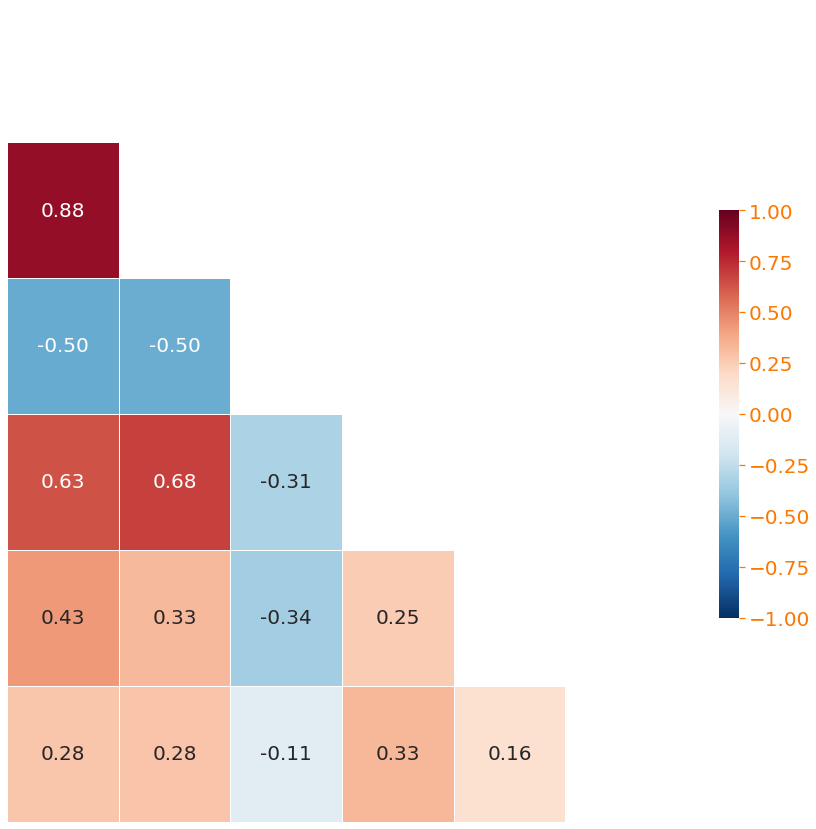

In [22]:
matrice_correlation(Df_ACP.iloc[:,[1,2,3,4,5,6]])
